# Confusion Matrix

混淆矩陣可以幫助我們理解分類模型在不同類別上的預測性能。

CIFAR-10 包含 10 個類別的 60,000 張彩色圖像。

In [1]:
from tensorflow.keras.datasets import cifar10

# 讀取 CIFAR-10 數據集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 打印數據集的形狀
print(f'x_train shape: {x_train.shape}')  # (50000, 32, 32, 3)
print(f'y_train shape: {y_train.shape}')  # (50000, 1)
print(f'x_test shape: {x_test.shape}')    # (10000, 32, 32, 3)
print(f'y_test shape: {y_test.shape}')    # (10000, 1)

# CIFAR-10 的類別名稱
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(class_names)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Training data class counts:
airplane      5000
automobile    5000
bird          5000
cat           5000
deer          5000
dog           5000
frog          5000
horse         5000
ship          5000
truck         5000
Name: count, dtype: int64

Test data class counts:
airplane      1000
automobile    1000
bird          1000
cat           1000
deer          1000
dog           1000
frog          1000
horse         1000
ship          1000
truck         1000
Name: count, dtype: int64


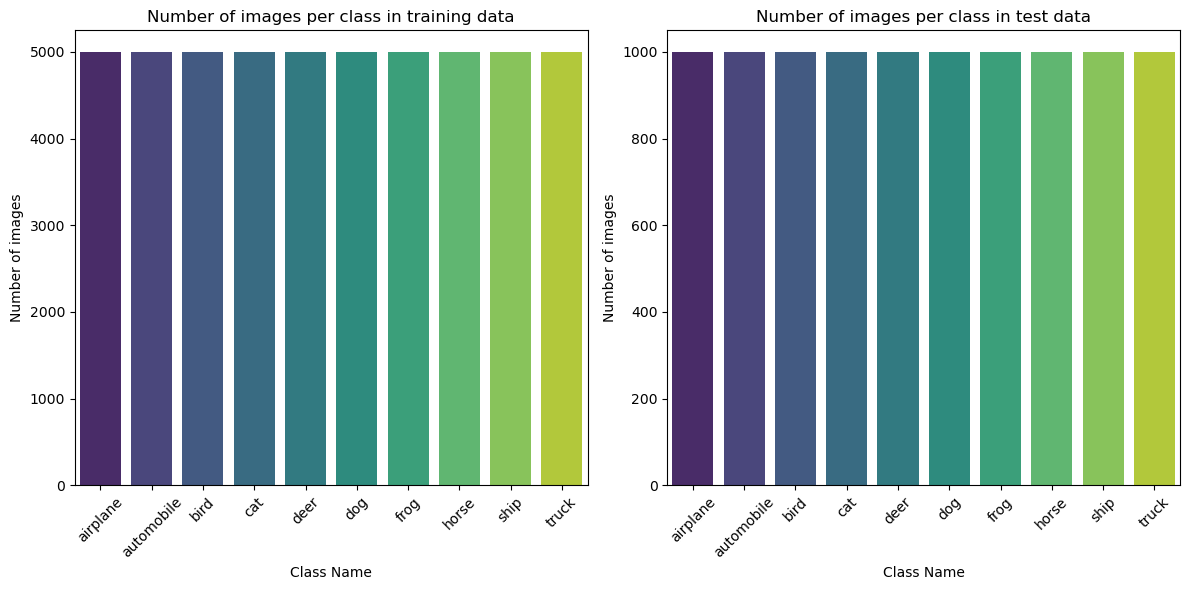

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import seaborn as sns

# CIFAR-10 的類別名稱
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 讀取 CIFAR-10 數據集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 計算每個類別的圖像數量
train_class_counts = pd.Series(y_train.flatten()).value_counts().sort_index()
test_class_counts = pd.Series(y_test.flatten()).value_counts().sort_index()

# 將標籤數字轉換為類別名稱
train_class_counts.index = class_names
test_class_counts.index = class_names

# 打印每個類別的圖像數量
print("Training data class counts:")
print(train_class_counts)
print("\nTest data class counts:")
print(test_class_counts)

# 可視化每個類別的圖像數量
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=train_class_counts.index, y=train_class_counts.values, palette="viridis", hue=train_class_counts.index, dodge=False)
plt.title('Number of images per class in training data')
plt.xlabel('Class Name')
plt.ylabel('Number of images')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  # 移除圖例

plt.subplot(1, 2, 2)
sns.barplot(x=test_class_counts.index, y=test_class_counts.values, palette="viridis", hue=test_class_counts.index, dodge=False)
plt.title('Number of images per class in test data')
plt.xlabel('Class Name')
plt.ylabel('Number of images')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  # 移除圖例

# 顯示圖表
plt.tight_layout()
plt.show()

## 訓練模型

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 74ms/step - accuracy: 0.2652 - loss: 1.9401 - val_accuracy: 0.5090 - val_loss: 1.3279
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - accuracy: 0.4871 - loss: 1.4004 - val_accuracy: 0.5923 - val_loss: 1.1125
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 133s 170ms/step - accuracy: 0.5608 - loss: 1.2251 - val_accuracy: 0.6387 - val_loss: 1.0250
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 82ms/step - accuracy: 0.5972 - loss: 1.1253 - val_accuracy: 0.6945 - val_loss: 0.8775
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 80ms/step - accuracy: 0.6365 - loss: 1.0352 - val_accuracy: 0.6641 - val_loss: 0.9679
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 88ms/step - accuracy: 0.6489 - loss: 0.9893 - val_accuracy: 0.6894 - val_loss: 0.8827
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 109ms/step - accuracy: 0.6653 - loss: 0.9415 - val_accuracy: 0.6927 - val_loss: 0.8886
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 147s 187ms/step - accuracy: 0.6787 - loss: 0.9

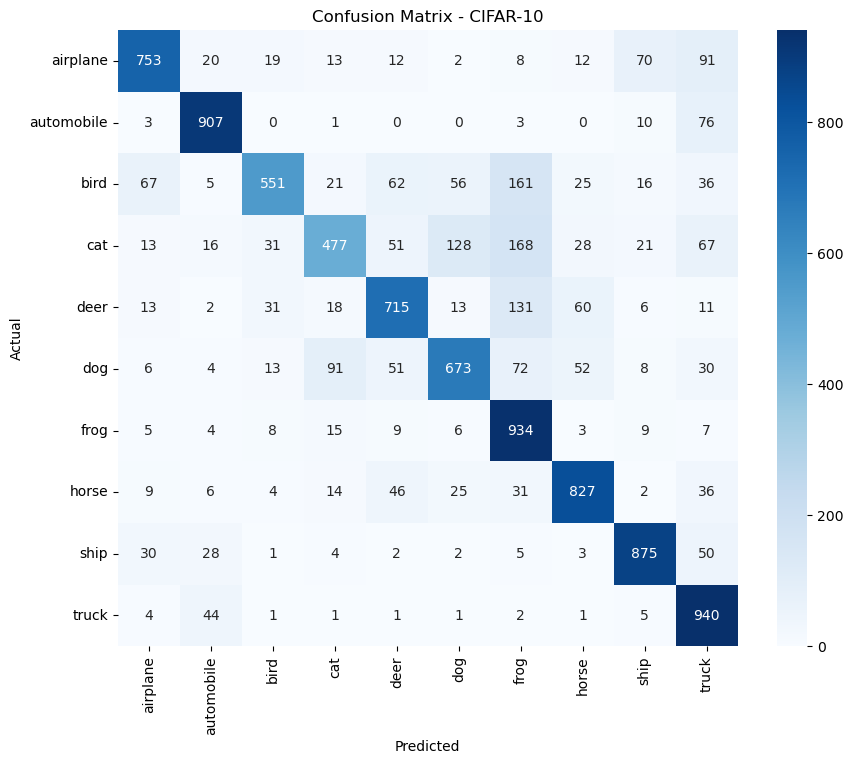

In [4]:
import numpy as np
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取 CIFAR-10 數據集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 轉換標籤為 one-hot 編碼
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# 將圖像數據標準化到 [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 建立數據增強器
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# 建立模型
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# 編譯模型
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型
model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=20, validation_data=(x_test, y_test))

# 保存模型
if not os.path.exists('model'):
    os.makedirs('model')
model.save(os.path.join('model', 'cifar10_cnn_model.keras'))

# 評估模型
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# 使用模型進行預測
y_pred = model.predict(x_test)

# 取得預測的類別（取最大值的索引）
answer = np.argmax(y_test, axis=1)
predicted = np.argmax(y_pred, axis=1)

# 計算混淆矩陣
C = confusion_matrix(answer, predicted)

# 打印混淆矩陣
print(C)

# 顯示並保存混淆矩陣
plt.figure(figsize=(10, 8))
sns.heatmap(C, annot=True, fmt='d', cmap='Blues', xticklabels=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], yticklabels=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CIFAR-10')

# 保存圖表
# 檢查目錄是否存在，如果不存在則創建
if not os.path.exists('image'):
    os.makedirs('image')
plt.savefig(os.path.join('image', 'confusion_matrix_cifar10.png'))

# 顯示圖表
plt.show()

# F1 vs AUC

- 不平衡數據集：F1 Score 通常比 ROC-AUC 更有用，因為它能更好地反映模型在不平衡數據集上的性能。
- 整體性能評估：ROC-AUC 是一個很好的整體指標，但需要小心解讀在不平衡數據集上的結果。

F1 Score: 0.83
AUC Score: 0.79


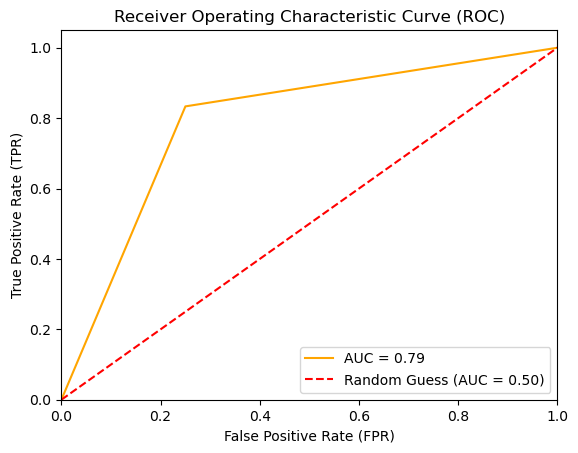

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, f1_score

# 真實標籤
y_test = [0, 1, 0, 1, 1, 0, 1, 0, 1, 1]

# 預測標籤
y_pred = [0, 1, 0, 0, 1, 0, 1, 1, 1, 1]

# 計算 F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:0.2f}')

# 計算 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC Score: {roc_auc:0.2f}')

# 繪製 ROC 曲線
plt.figure()
plt.title('Receiver Operating Characteristic Curve (ROC)')
plt.plot(fpr, tpr, color='orange', label=f'AUC = {roc_auc:0.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess (AUC = 0.50)')
plt.legend(loc='lower right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()